In [1]:
import matplotlib.pyplot as plt                                                                                              
import numpy as np                                                                                                           
import netCDF4 as nc                                                                                                         
import argparse                                                                                                              
import configparser                                                                                                          
import sys                                                                                                                   
import matplotlib as mpl                                                                                                     
from pathlib import Path                                                                                                     
import matplotlib.dates as mdates                                                                                         

In [40]:
# Load data
input_file = '../data/my_exp1_atm_3d_ml_20180921T000000Z.nc'
var_name = 'u' # name of variable
time = 0
with nc.Dataset(input_file) as ncf:                                                                                      
    var = ncf.variables[var_name]
    dims = var.dimensions # check name of dimensions                                                                                               
    height = ncf.variables[dims[1]][:]                                                                                                                    
    var = var[time,:,:] # take variable at certain point in time                                                                                                                                                                   
    # var = var.mean(axis=0) # Take mean over time
    lats = ncf.variables['clat'][:]
    lons = ncf.variables['clon'][:]
lats = np.rad2deg(lats)
lons = np.rad2deg(lons)

In [46]:
# Get mean over whole map
var_mean = var.mean(axis=1)

In [43]:
# Get values of grid cell closest to coordinate
# E.g. Zürich:
lon = 8.54
lat = 47.38
def ind_from_latlon(lats, lons, lat, lon, verbose=False):                                                                    
    """Find the nearest neighbouring index to given location.                                                                
    Args:                                                                                                                    
        lats (2d array):            Latitude grid                                                                            
        lons (2d array):            Longitude grid                                                                           
        lat (float):                Latitude of location                                                                     
        lon (float):                Longitude of location                                                                    
        verbose (bool, optional):   Print information. Defaults to False.                                                    
    Returns:                                                                                                                 
        int     Index of nearest grid point.                                                                                 
    """                                                                                                                      
    dist = [                                                                                                                 
        np.sqrt((lats[i] - lat) ** 2 + (lons[i] - lon) ** 2) for i in range(len(lats))                                       
    ]                                                                                                                        
    ind = np.where(dist == np.min(dist))[0][0]                                                                               
    if verbose:                                                                                                              
        print(f"Closest ind: {ind}")                                                                                         
        print(f" Given lat: {lat:.3f} vs found lat: {lats[ind]:.3f}")                                                        
        print(f" Given lon: {lon:.3f} vs found lon: {lons[ind]:.3f}")                                                        
    return ind 

ind = ind_from_latlon(lats,lons,lat,lon,verbose=True)
var_coord = var[:,ind]

Closest ind: 3352
 Given lat: 47.380 vs found lat: 47.372
 Given lon: 8.540 vs found lon: 8.527


(0.0, 70.0)

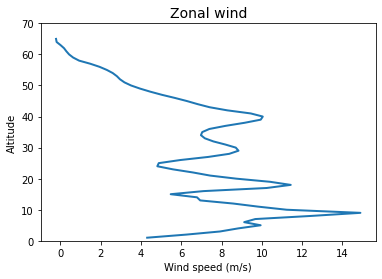

In [58]:
# Create plot (plot var_mean or var_coord)
f, axes = plt.subplots(1,1)                                                                                              
ax = axes                                                                                                                
h = ax.plot(var_coord, height, lw=2)
ax.set_xlabel('Wind speed (m/s)')
ax.set_ylabel('Altitude')
ax.set_title('Zonal wind', fontsize=14)
plt.ylim([0,70])